In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import statsmodels.api as sm

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
housing_df = pd.DataFrame(data = housing.data, columns = housing.feature_names)
housing_df['HousePrice'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Used above array from dictionary of housing
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [5]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [6]:
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
HousePrice,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [7]:
housing_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HousePrice    0
dtype: int64

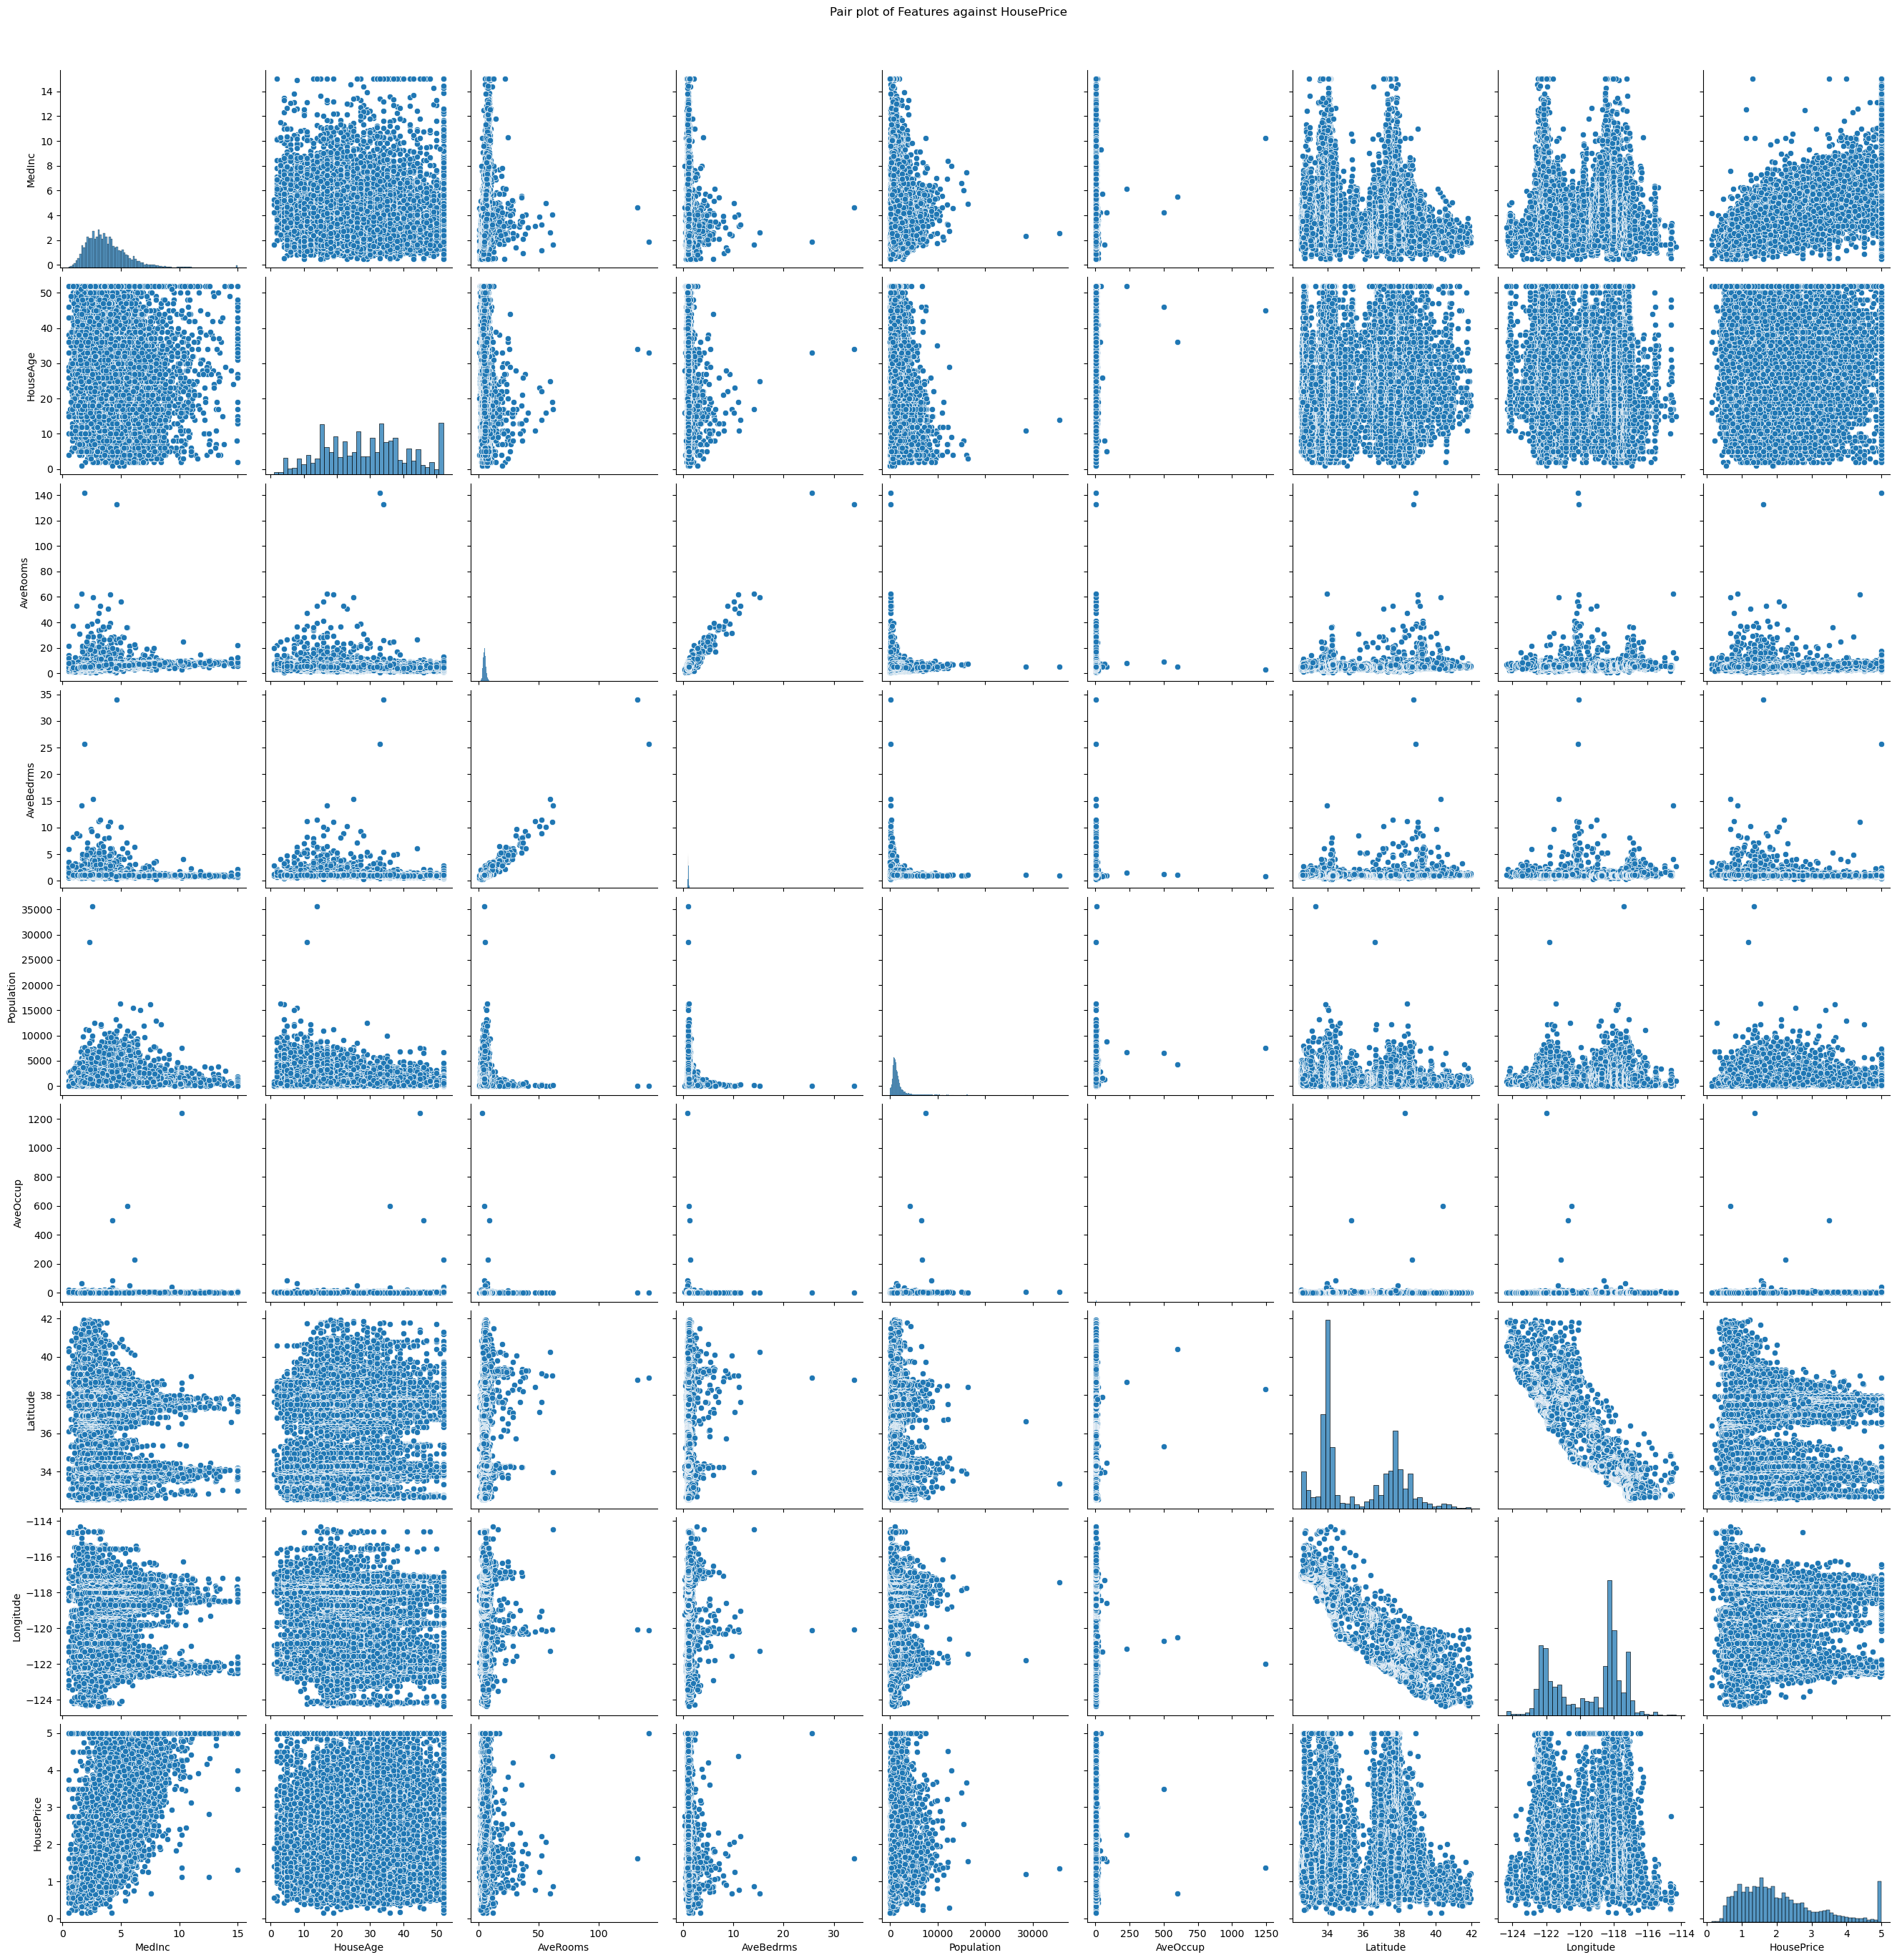

In [8]:
sns.pairplot(housing_df, height=3)
plt.suptitle('Pair plot of Features against HousePrice', y=1.02)
plt.show()

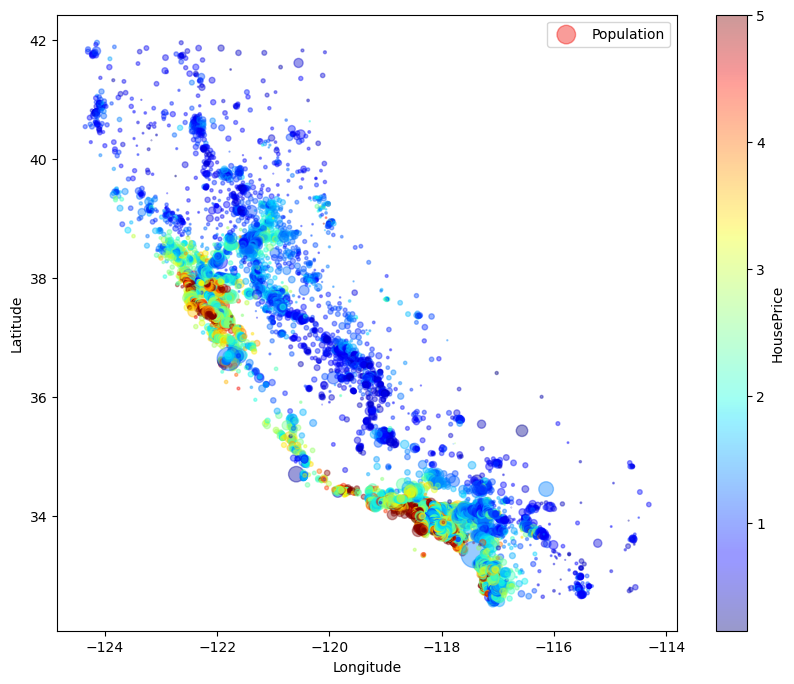

In [9]:
housing_df.plot(
    kind='scatter',
    x='Longitude',
    y='Latitude',
    alpha=0.4,
    s=housing_df["Population"]/100,
    label="Population",
    c="HousePrice",
    cmap="jet",
    colorbar=True,
    figsize=(10,8)
)
plt.show()

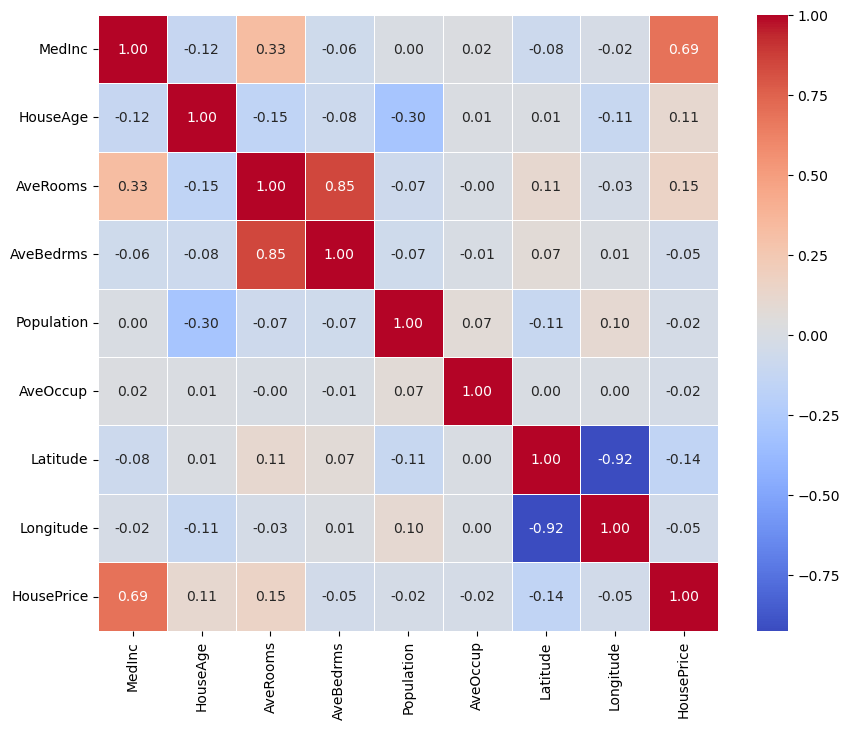

In [10]:
corr = housing_df.corr()
plt.figure(figsize=(10,8))

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.show()

In [11]:
corr["HousePrice"].abs().sort_values(ascending=False)

HousePrice    1.000000
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: HousePrice, dtype: float64

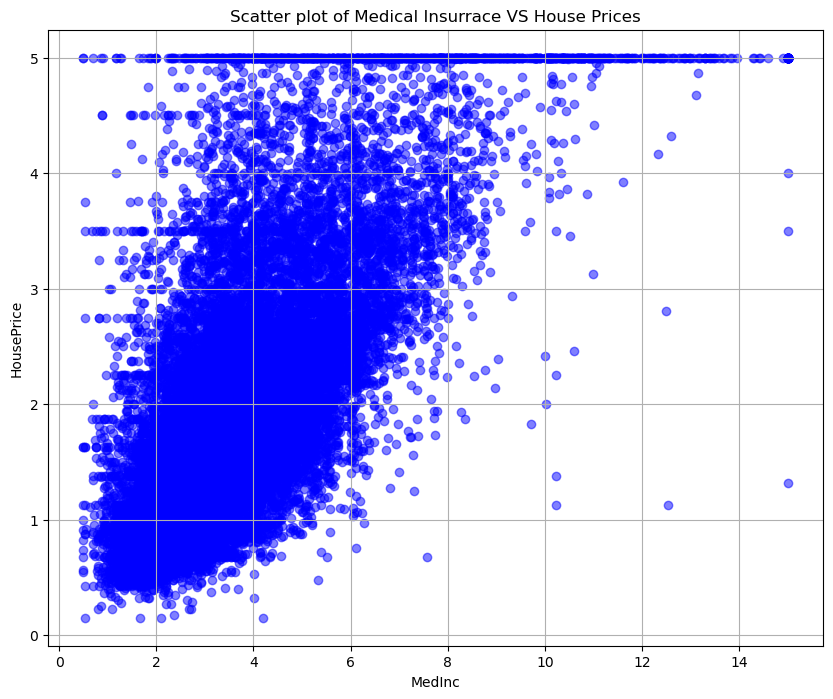

In [12]:
medinc = housing_df["MedInc"]
houseprice = housing_df["HousePrice"]

plt.figure(figsize=(10,8))
plt.scatter(medinc, houseprice, alpha=0.5, color="blue")
plt.title("Scatter plot of Medical Insurrace VS House Prices")
plt.xlabel("MedInc")
plt.ylabel("HousePrice")
plt.grid(True)
plt.show()

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

housing_df_vif = housing_df.drop('HousePrice', axis=1)
housing_df_vif = housing_df.apply(pd.to_numeric, errors = "coerce")

vif_data = pd.DataFrame()
vif_data['Features'] = housing_df_vif.columns
vif_data["VIF"] = [VIF(housing_df_vif.values, i) for i in range(len(housing_df_vif.columns))]
print(vif_data)

     Features         VIF
0      MedInc   19.624998
1    HouseAge    7.592663
2    AveRooms   47.956351
3   AveBedrms   45.358192
4  Population    2.936078
5    AveOccup    1.099530
6    Latitude  568.497332
7   Longitude  640.064211
8  HousePrice    9.285659


In [14]:
housing_df.drop(['Latitude','Longitude'], inplace=True, axis=1)

In [15]:
cols_to_convert = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
housing_df[cols_to_convert] = housing_df[cols_to_convert].apply(pd.to_numeric, errors = "coerce")
housing_df['HousePrice'] = pd.to_numeric(housing_df["HousePrice"], errors = "coerce")

X = sm.add_constant(housing_df.drop("HousePrice", axis=1))
y = housing_df["HousePrice"]

model = sm.OLS(y,X).fit()

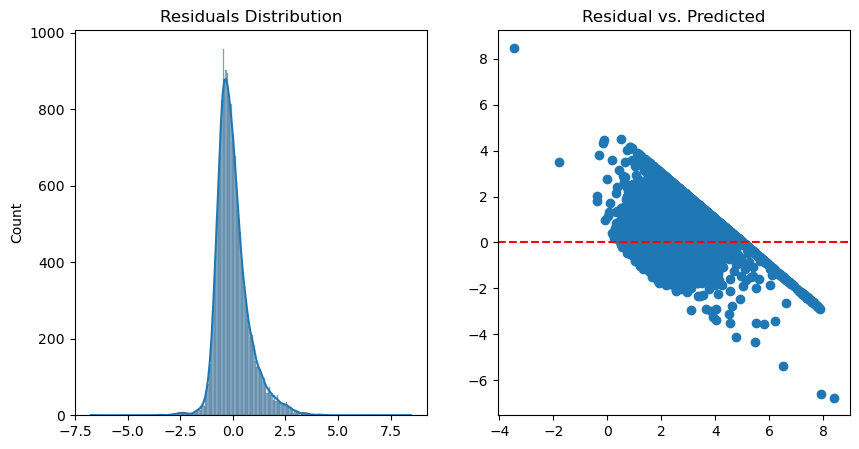

Model coefficients:
 const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64


In [17]:
residuals = model.resid

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")

plt.subplot(1,2,2)
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='red', linestyle = '--')
plt.title("Residual vs. Predicted")
plt.show()

print("Model coefficients:\n", model.params)

In [19]:
from sklearn.metrics import mean_squared_error as MSE, r2_score

In [20]:
predictions = model.predict(X)

print("R sqared score: ", r2_score(y, predictions))
print("MSE: ", MSE(y, predictions))

R sqared score:  0.5396977345638283
MSE:  0.6129156196698703


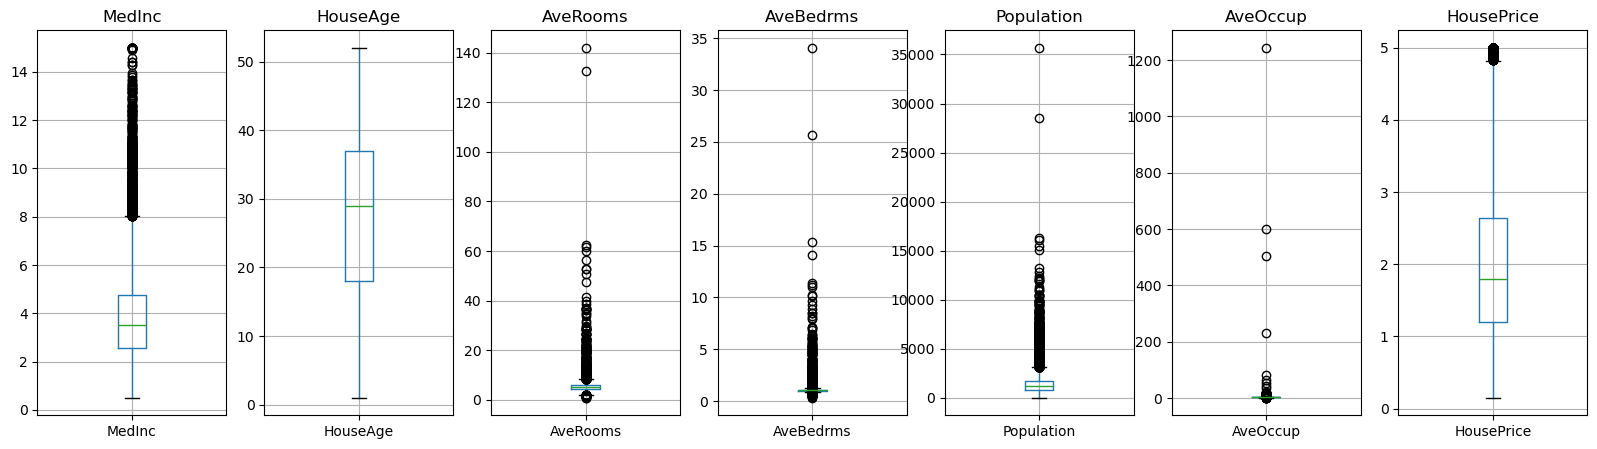

In [24]:
def plot_boxplots(df):
    fig, axes = plt.subplots(1, len(df.columns), figsize=(20,5))
    for  i, column_name in enumerate(df.columns):
        df.boxplot(column=column_name, ax=axes[i])
        axes[i].set_title(column_name)
    plt.show()

plot_boxplots(housing_df)

In [28]:
def remove_outliers(df):
    df_no_outliers = df.copy()  # Create a copy to avoid modifying the original DataFrame
    for column_name in df.columns:  # Loop over each column in the DataFrame
        Q1 = df[column_name].quantile(0.25)  # 25th percentile
        Q3 = df[column_name].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range

        # Calculate upper and lower bounds for outliers
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR

        # Apply the lambda function to each value in the column
        df_no_outliers[column_name] = df_no_outliers[column_name].apply(
            lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
        )

    return df_no_outliers  # Return the DataFrame after processing all columns

# Apply the function to the DataFrame
housing_df_new = remove_outliers(housing_df)


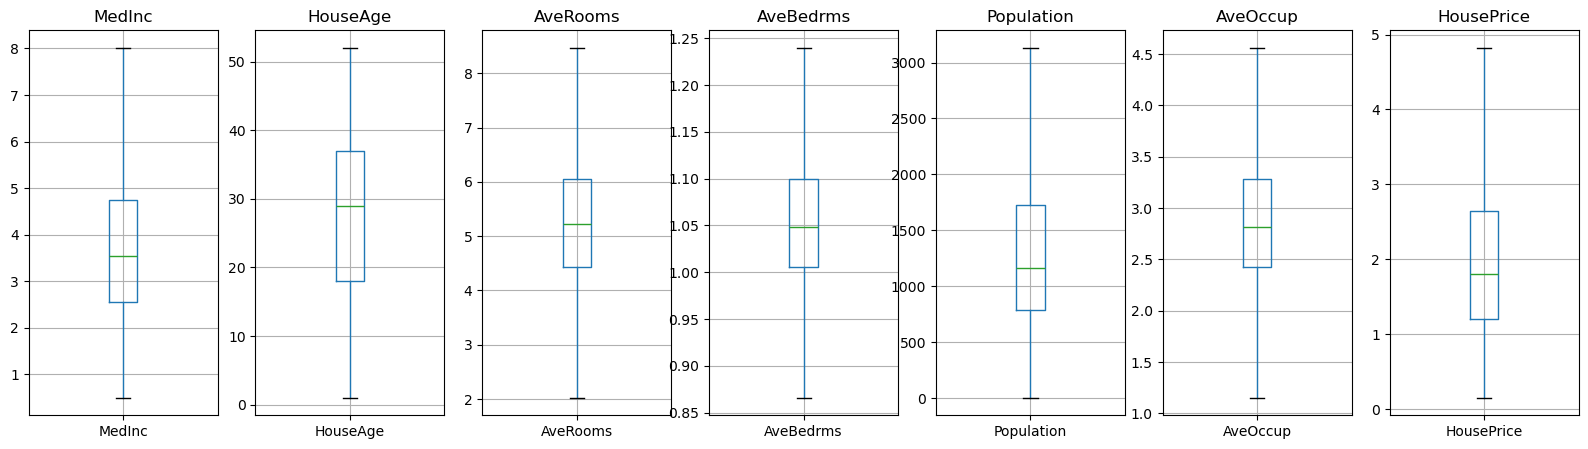

In [29]:
plot_boxplots(housing_df_new)

In [30]:
cols_to_convert = ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup']
housing_df_new[cols_to_convert] = housing_df[cols_to_convert].apply(pd.to_numeric, errors = "coerce")
housing_df_new["HousePrice"] = pd.to_numeric(housing_df_new["HousePrice"], errors = "coerce")

X = sm.add_constant(housing_df_new.drop('HousePrice', axis=1))
y = housing_df_new['HousePrice']

model = sm.OLS(y, X).fit()

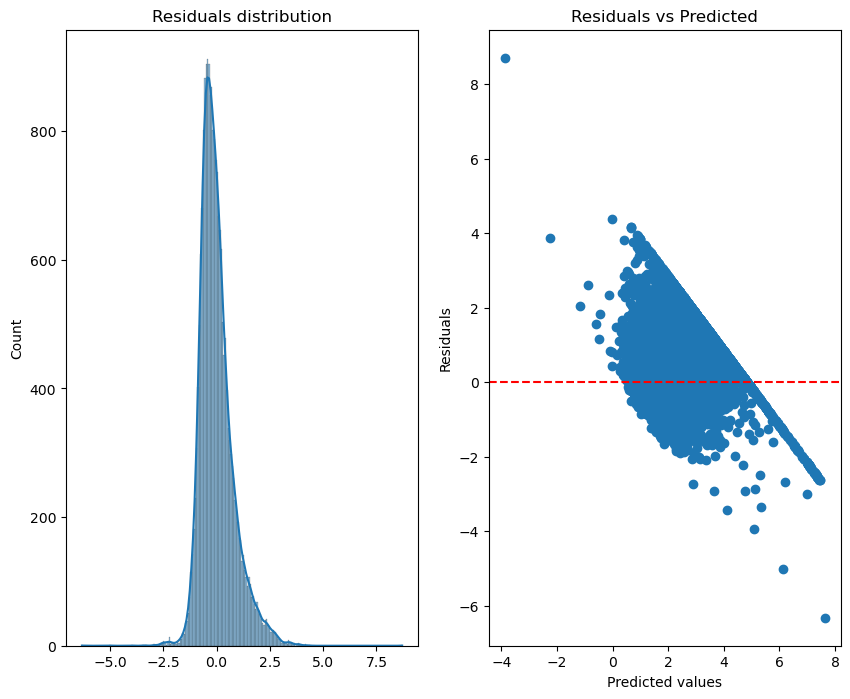

Model coefficient:
 const        -1.594594
MedInc        0.453368
HouseAge      0.018443
AveRooms     -0.039156
AveBedrms     1.470674
Population    0.000030
AveOccup     -0.004579
dtype: float64


In [31]:
residuals = model.resid

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True)
plt.title("Residuals distribution")

plt.subplot(1,2,2)
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

print("Model coefficient:\n", model.params)